#<center>Project on Design and Analysis of Algorithms</center>

#  <center>Title: Developing Ensemble Model Using Greedy Approach</center>
## <center>by Mehak Aggarwal(03104092021), Taniya Jain(06404092021)</center>

### Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
from google.colab import files
f=files.upload()


Saving collegePlaceOriginal.csv to collegePlaceOriginal.csv


In [ ]:
#Reading the dataset
dataset = pd.read_csv('collegePlaceOriginal.csv')

In [ ]:
dataset.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [ ]:
dataset.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


### Splitting Independent and Dependent variables

In [ ]:
X = dataset.iloc[:, 0:7].values
y = dataset.iloc[:, 7].values

In [ ]:
print("X:",X)
print()
print("y:",y)

X: [[22 'Male' 'Electronics And Communication' ... 8 1 1]
 [21 'Female' 'Computer Science' ... 7 1 1]
 [22 'Female' 'Information Technology' ... 6 0 0]
 ...
 [22 'Male' 'Information Technology' ... 7 0 0]
 [22 'Male' 'Computer Science' ... 7 0 0]
 [23 'Male' 'Civil' ... 8 0 0]]

y: [1 1 1 ... 0 0 1]


### Preprocessing : OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
t = ColumnTransformer([("placed", OneHotEncoder(), [1,2])], remainder = 'passthrough')
X = t.fit_transform(X)

In [ ]:
print(X)

[[0.0 1.0 0.0 ... 8 1 1]
 [1.0 0.0 0.0 ... 7 1 1]
 [1.0 0.0 0.0 ... 6 0 0]
 ...
 [0.0 1.0 0.0 ... 7 0 0]
 [0.0 1.0 0.0 ... 7 0 0]
 [0.0 1.0 1.0 ... 8 0 0]]


### Splitting dataset into training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0, stratify = y)

In [ ]:
X_train

array([[1.0, 0.0, 0.0, ..., 7, 0, 1],
       [0.0, 1.0, 0.0, ..., 7, 0, 0],
       [0.0, 1.0, 0.0, ..., 8, 0, 0],
       ...,
       [0.0, 1.0, 0.0, ..., 6, 0, 0],
       [1.0, 0.0, 0.0, ..., 8, 1, 1],
       [1.0, 0.0, 0.0, ..., 7, 0, 0]], dtype=object)

#Classifiers
- prediction
- performance measures

In [ ]:
model1 = LogisticRegression(solver='lbfgs', max_iter=1000)
model2 = DecisionTreeClassifier(max_depth = 2)
model3 = SVC()
model4 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model5 = GaussianNB()

In [ ]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)
y_pred5 = model5.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
cm_LogisticRegression = confusion_matrix(y_test, y_pred1)
cm_DecisionTree = confusion_matrix(y_test, y_pred2)
cm_SupportVectorClass = confusion_matrix(y_test, y_pred3)
cm_KNN = confusion_matrix(y_test, y_pred4)
cm_NaiveBayes = confusion_matrix(y_test, y_pred5)

## LogisticRegression

In [ ]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred1)}")
print(f"Precision Score: {precision_score(y_test, y_pred1)}")
print(f"Recall Score: {recall_score(y_test, y_pred1)}")
print(f"F1 Score: {f1_score(y_test, y_pred1)}")
print(cm_LogisticRegression)

Accuracy Score: 0.7573033707865169
Precision Score: 0.76953125
Recall Score: 0.8008130081300813
F1 Score: 0.7848605577689243
[[140  59]
 [ 49 197]]


## Decision Tree

In [ ]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred2)}")
print(f"Precision Score: {precision_score(y_test, y_pred2)}")
print(f"Recall Score: {recall_score(y_test, y_pred2)}")
print(f"F1 Score: {f1_score(y_test, y_pred2)}")
print(cm_DecisionTree)

Accuracy Score: 0.8674157303370786
Precision Score: 0.9560975609756097
Recall Score: 0.7967479674796748
F1 Score: 0.8691796008869179
[[190   9]
 [ 50 196]]


## SVM

In [ ]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred3)}")
print(f"Precision Score: {precision_score(y_test, y_pred3)}")
print(f"Recall Score: {recall_score(y_test, y_pred3)}")
print(f"F1 Score: {f1_score(y_test, y_pred3)}")
print(cm_SupportVectorClass)

Accuracy Score: 0.7662921348314606
Precision Score: 0.808695652173913
Recall Score: 0.7560975609756098
F1 Score: 0.7815126050420168
[[155  44]
 [ 60 186]]


## KNN

In [ ]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred4)}")
print(f"Precision Score: {precision_score(y_test, y_pred4)}")
print(f"Recall Score: {recall_score(y_test, y_pred4)}")
print(f"F1 Score: {f1_score(y_test, y_pred4)}")
print(cm_KNN)

Accuracy Score: 0.8584269662921349
Precision Score: 0.9030837004405287
Recall Score: 0.8333333333333334
F1 Score: 0.8668076109936576
[[177  22]
 [ 41 205]]


##GaussianNB

In [ ]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred5)}")
print(f"Precision Score: {precision_score(y_test, y_pred5)}")
print(f"Recall Score: {recall_score(y_test, y_pred5)}")
print(f"F1 Score: {f1_score(y_test, y_pred5)}")
print(cm_NaiveBayes)

Accuracy Score: 0.7842696629213484
Precision Score: 0.7697841726618705
Recall Score: 0.8699186991869918
F1 Score: 0.8167938931297709
[[135  64]
 [ 32 214]]


# Base Ensemble

###**SVM + NB + KNN + LR + DT**

In [ ]:
base_estimator=[]
model1 = SVC(kernel = 'linear')
base_estimator.append(('svm1', model1))
model2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
base_estimator.append(('knn1', model2))
model3 = DecisionTreeClassifier(max_depth = 3)
base_estimator.append(('cart1', model3))
model4 = GaussianNB()
base_estimator.append(('nbs1', model4))
model5 = LogisticRegression(penalty = 'l2', random_state = 0,solver='lbfgs', max_iter=1000)
base_estimator.append(('logistic1', model5))


base_ensemble = VotingClassifier(base_estimator)
base_ensemble.fit(X_train, y_train)
y_pred = base_ensemble.predict(X_test)

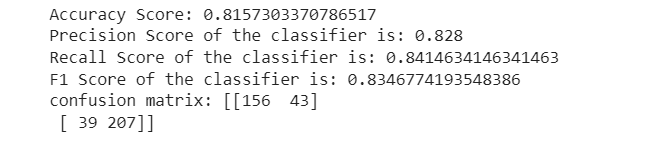

In [ ]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"Precision Score of the classifier is: {precision_score(y_test, y_pred)}")
print(f"Recall Score of the classifier is: {recall_score(y_test, y_pred)}")
print(f"F1 Score of the classifier is: {f1_score(y_test, y_pred)}")
cm_BaseEnsembler = confusion_matrix(y_test, y_pred)
print("confusion matrix:",cm_BaseEnsembler)

Accuracy Score: 0.8157303370786517
Precision Score of the classifier is: 0.828
Recall Score of the classifier is: 0.8414634146341463
F1 Score of the classifier is: 0.8346774193548386
confusion matrix: [[156  43]
 [ 39 207]]


# Optimised Ensemble using greedy approach 


In [ ]:
estimators = []


!!!!!!! Run only after estimators is appended !!!!!!!

In [ ]:
ensemble = VotingClassifier(estimators)

In [ ]:
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('cart1', DecisionTreeClassifier(max_depth=3))])

In [ ]:
y_pred = ensemble.predict(X_test)

In [ ]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"Precision Score of the classifier is: {precision_score(y_test, y_pred)}")
print(f"Recall Score of the classifier is: {recall_score(y_test, y_pred)}")
print(f"F1 Score of the classifier is: {f1_score(y_test, y_pred)}")
cm_HybridEnsembler = confusion_matrix(y_test, y_pred)
print("confusion matrix:",cm_HybridEnsembler)

Accuracy Score: 0.8853932584269663
Precision Score of the classifier is: 0.9452054794520548
Recall Score of the classifier is: 0.8414634146341463
F1 Score of the classifier is: 0.8903225806451612
confusion matrix: [[187  12]
 [ 39 207]]


## Iterations in which estimator is appended

###iteration 1

In [ ]:
#1 DT
estimators = []
model1 = DecisionTreeClassifier(max_depth = 3)
estimators.append(('cart1', model1))


In [ ]:

#2 DT
estimators = []
model1 = DecisionTreeClassifier(max_depth = 3)
estimators.append(('cart1', model1))
model2 = DecisionTreeClassifier(max_depth = 4)
estimators.append(('cart2', model2))


## 2 DT

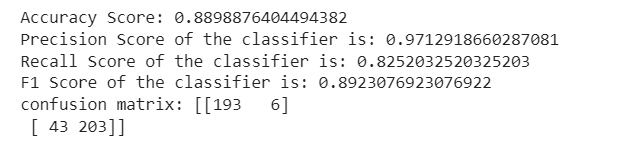

###  Iteration 2

In [ ]:

# 2 DT + 1 KNN
estimators = []
model1 = DecisionTreeClassifier(max_depth = 3)
estimators.append(('cart1', model1))
model2 = DecisionTreeClassifier(max_depth = 4)
estimators.append(('cart2', model2))
model3 = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
estimators.append(('knn1', model3))


## 2 DT + 1 KNN
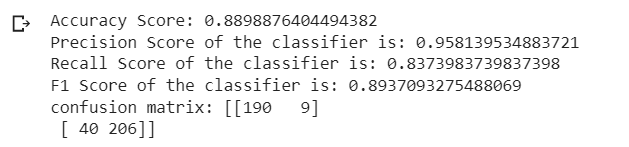

In [ ]:


# 2 DT + 2 KNN
estimators = []
model1 = DecisionTreeClassifier(max_depth = 3)
estimators.append(('cart1', model1))
model2 = DecisionTreeClassifier(max_depth = 4)
estimators.append(('cart2', model2))
model3 = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
estimators.append(('knn1', model3))
model4 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
estimators.append(('knn2', model4))

## 2 DT + 2 KNN (discarded)
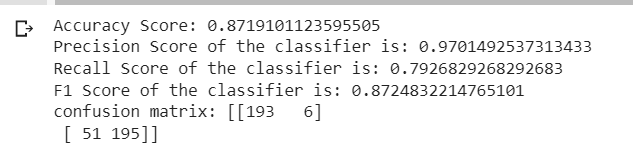

###  Iteration 3

In [ ]:

# 2 DT + 1 KNN + 1 NB
estimators = []
model1 = DecisionTreeClassifier(max_depth = 3)
estimators.append(('cart1', model1))
model2 = DecisionTreeClassifier(max_depth = 4)
estimators.append(('cart2', model2))
model3 = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
estimators.append(('knn1', model3))
model4 = GaussianNB()
estimators.append(('nbs4', model4))



## 2 DT + 1 KNN + 1 NB 

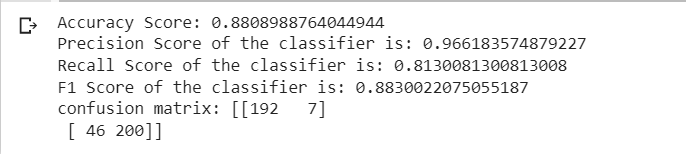

In [ ]:

# 2 DT + 1 KNN + 2 NB
estimators = []
model1 = DecisionTreeClassifier(max_depth = 3)
estimators.append(('cart1', model1))
model2 = DecisionTreeClassifier(max_depth = 4)
estimators.append(('cart2', model2))
model3 = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
estimators.append(('knn1', model3))
model4 = GaussianNB()
estimators.append(('nbs4', model4))
model5 = GaussianNB()
estimators.append(('nbs5', model5))


## 2 DT + 1 KNN + 2 NB (DISCARDED)
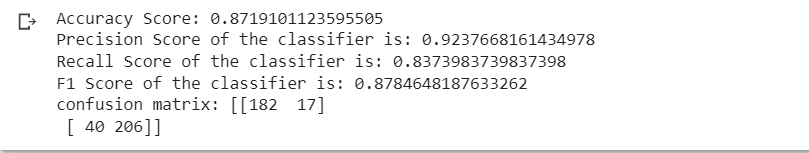

### Iteration 4

In [ ]:


# 2 DT + 1 KNN + 1 LR
estimators = []
model1 = DecisionTreeClassifier(max_depth = 3)
estimators.append(('cart1', model1))
model2 = DecisionTreeClassifier(max_depth = 4)
estimators.append(('cart2', model2))
model3 = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
estimators.append(('knn1', model3))
model4 = LogisticRegression(penalty = 'l2', random_state = 0,solver='lbfgs', max_iter=1000)
estimators.append(('logistic4', model4))



## 2 DT + 1 KNN + 1 LR 
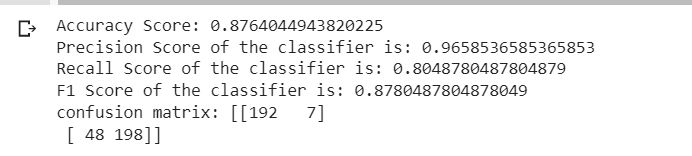

In [ ]:

# 2 DT + 1 KNN + 2 LR
estimators = []
model1 = DecisionTreeClassifier(max_depth = 3)
estimators.append(('cart1', model1))
model2 = DecisionTreeClassifier(max_depth = 4)
estimators.append(('cart2', model2))
model3 = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
estimators.append(('knn1', model3))
model4 = LogisticRegression(penalty = 'l2', random_state = 0,solver='lbfgs', max_iter=1000)
estimators.append(('logistic4', model4))
model5 = LogisticRegression(penalty = 'l2', random_state = 0,solver='lbfgs', max_iter=1000)
estimators.append(('logistic5', model5))



## 2 DT + 1 KNN + 2 LR (DISCARDED)

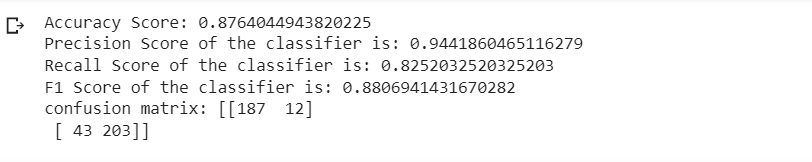

### Iteration 5

In [ ]:

# 2 DT + 1 KNN + 1 SVM
estimators = []
model1 = DecisionTreeClassifier(max_depth = 3)
estimators.append(('cart1', model1))
model2 = DecisionTreeClassifier(max_depth = 4)
estimators.append(('cart2', model2))
model3 = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
estimators.append(('knn1', model3))
model4 = SVC(kernel = 'poly')
estimators.append(('svm1', model4))





## 2 DT + 1 KNN + 1 SVM 
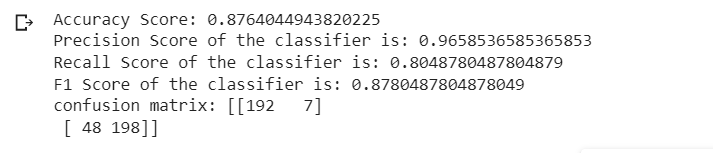

In [ ]:
# 2 DT + 1 KNN + 2 SVM
estimators = []
model1 = DecisionTreeClassifier(max_depth = 3)
estimators.append(('cart1', model1))
model2 = DecisionTreeClassifier(max_depth = 4)
estimators.append(('cart2', model2))
model3 = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
estimators.append(('knn1', model3))
model4 = SVC(kernel = 'poly')
estimators.append(('svm1', model4))
model5 = SVC(kernel = 'rbf')
estimators.append(('svm3', model5))


##2 DT + 1 KNN + 2 SVM (DISCARDED)

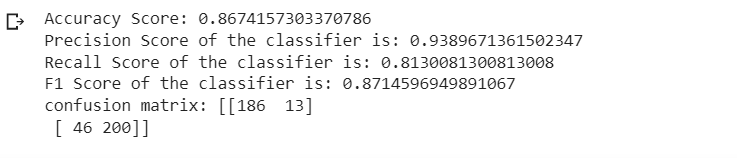

by Mehak Aggarwal(03104092021), Taniya Jain(06404092021)